In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import json
from math import sqrt
%matplotlib notebook

In [8]:
prefix = "../data/"
# prefix = "./timeSqExp/testNaive/"

df = pd.read_csv(prefix+"data.csv")
df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','time']
df["x+"] = df["x"] + df["x_std"]
df["y+"] = df["y"] + df["y_std"]
df["z+"] = df["z"] + df["z_std"]
df["x-"] = df["x"] - df["x_std"]
df["y-"] = df["y"] - df["y_std"]
df["z-"] = df["z"] - df["z_std"]

print(df)

           x         y         z     x_std     y_std     z_std   time  \
0  -0.266564  0.263843 -0.103949  0.050010  0.049907  0.053739  61192   
1  -0.211434  0.106362 -0.161013  0.050408  0.050259  0.055005  85759   
2  -0.204570  0.083326 -0.126605  0.050153  0.050036  0.054570  34126   
3  -0.181905  0.093016 -0.065022  0.050087  0.049977  0.054147  33628   
4  -0.064985  0.008423  0.005691  0.050064  0.049949  0.053972  32369   
..       ...       ...       ...       ...       ...       ...    ...   
95 -0.265403  0.010147  0.352411  0.052331  0.058572  0.066143  34245   
96 -0.272752 -0.021567  0.325543  0.053933  0.062066  0.062932  35103   
97 -0.278062 -0.021646  0.318687  0.053473  0.060520  0.058272  72953   
98 -0.323797  0.060746  0.291623  0.050873  0.054350  0.059357  70415   
99 -0.482246  0.146567  0.202169  0.050604  0.050445  0.057792  83012   

          x+        y+        z+        x-        y-        z-  
0  -0.216554  0.313750 -0.050210 -0.316574  0.213936 -0.15

In [3]:
path = pd.read_csv("path.csv")

print(path.tail())

df['gnd_x'] = path["x"] 
df['gnd_y'] = path["y"]
df['gnd_z'] = path["z"]

df.iloc[10]

      index         x         y         z
996     996 -0.263446 -0.067733  2.088647
997     997 -0.364201 -0.028504  2.140708
998     998 -0.454753  0.004004  2.182574
999     999 -0.537369  0.025985  2.214841
1000   1000 -0.615967  0.034738  2.237601


x           0.066993
y          -0.641186
z          -1.056550
x_std       0.003816
y_std       0.003137
z_std       0.003156
time     1648.000000
x+          0.070809
y+         -0.638049
z+         -1.053394
x-          0.063178
y-         -0.644323
z-         -1.059706
gnd_x       0.076027
gnd_y      -0.658572
gnd_z      -1.079498
Name: 10, dtype: float64

<IPython.core.display.Javascript object>


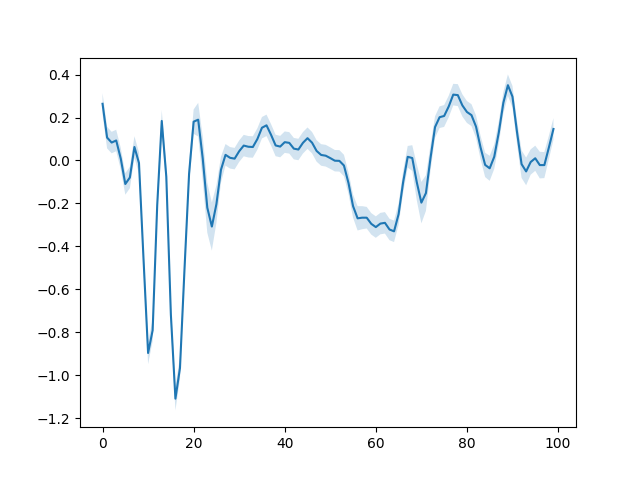

<IPython.core.display.Javascript object>


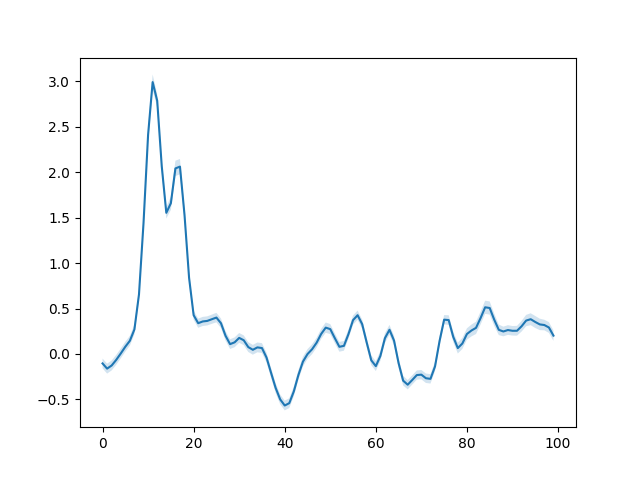

In [9]:
plt.plot(df.index, df['x'])
plt.fill_between(df.index, df['x+'], df['x-'], alpha=0.2)
# plt.plot(df.index, df['gnd_x'])

plt.figure()

plt.plot(df.index, df['y'])
plt.fill_between(df.index, df['y+'], df['y-'], alpha=0.2)
# plt.plot(df.index, df['gnd_y'])


plt.figure()
plt.plot(df.index, df['z'])
plt.fill_between(df.index, df['z+'], df['z-'], alpha=0.2)
# plt.plot(df.index, df['gnd_z'])

plt.show()


0.01160917925308341


<IPython.core.display.Javascript object>


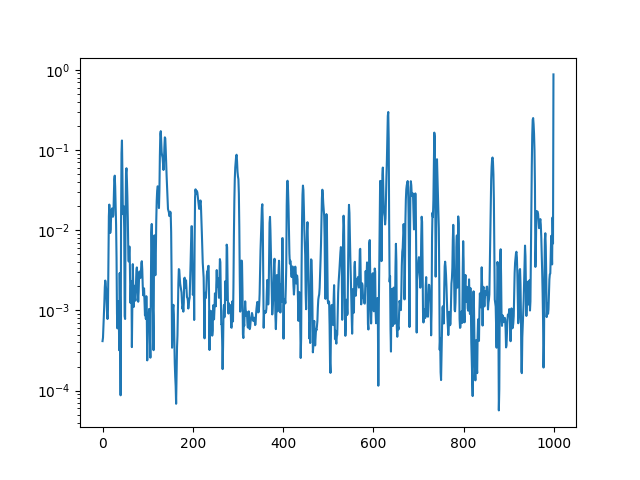

In [5]:
se = (df["x"]-df["gnd_x"])**2 + (df["y"]-df["gnd_y"])**2 + (df["z"]-df["gnd_z"])**2
mse = sum(se)/len(df['x'])
print(mse)
plt.figure()
plt.yscale("log")
plt.plot(df.index, se)
plt.show()

<IPython.core.display.Javascript object>


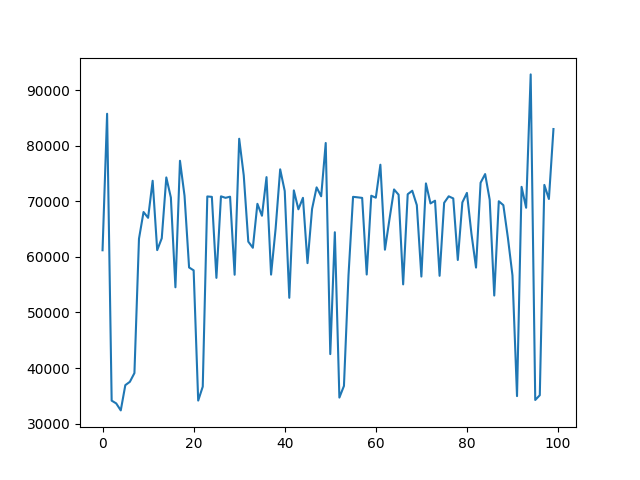

6.352194 s


In [10]:
plt.figure()
plt.plot(df.index, df['time'])
print(sum(df['time'])/10**6, "s")
plt.show()

In [11]:
# anchors = pd.read_csv(prefix+"anchors.csv")

with open("../data/anchors.json") as f:
    anchors = json.load(f)
    
x = [anchor["x"] for anchor in anchors]
y = [anchor["y"] for anchor in anchors]
z = [anchor["z"] for anchor in anchors]

anchors = list(zip(x,y,z))

print(anchors)

FileNotFoundError: [Errno 2] No such file or directory: '../data/anchors.json'

<IPython.core.display.Javascript object>


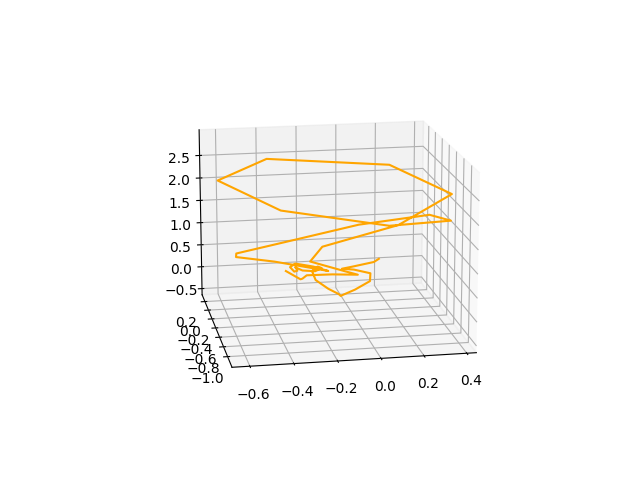

In [13]:
# df_50 = df[:50]

ax = plt.figure().add_subplot(projection='3d')
# ax.scatter(x,y,z)
ax.plot(df_50['x'],df_50['y'],df_50['z'], c="orange")
# ax.plot(df_50['gnd_x'],df_50['gnd_y'],df_50['gnd_z'], c="green")



In [ ]:
print(sum(df['time'])/10**6, "s")
print(se[len(se)-1])

In [ ]:


dx = [sqrt((anchors[0][0] - df["gnd_x"][i])**2+(anchors[0][1] - df["gnd_y"][i])**2+(anchors[0][2] - df["gnd_z"][i])**2) for i in range (30)]
print(dx)


200 step fully connected
8953 ms
0.018081515014227126

200 step fully connected
21 ms
0.018128581248011585
